In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [119]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv('test.csv')


In [120]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [121]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [122]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [123]:
def clean_data(df, drop_passenger_id=True):
    df = df.copy()

    # Drop unnecessary columns if they exist
    cols_to_drop = ['Cabin', 'Ticket', 'Name']
    if drop_passenger_id:
        cols_to_drop.append('PassengerId')
    df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True, errors='ignore')

    # Fill missing values
    if 'Age' in df.columns:
        df['Age'] = df['Age'].fillna(df['Age'].median())
    if 'Fare' in df.columns:
        df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    if 'Embarked' in df.columns:
        df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # Encode categorical variables
    if 'Sex' in df.columns:
        df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    if 'Embarked' in df.columns:
        df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

    return df


In [124]:
train_clean = clean_data(train_df)
test_clean = clean_data(test_df, drop_passenger_id=False)

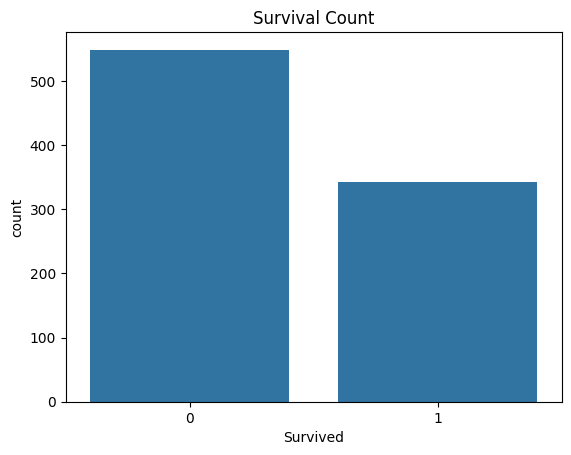

In [125]:
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()


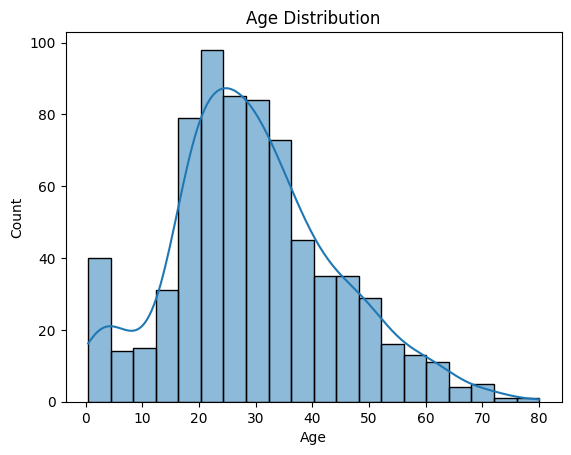

In [126]:
sns.histplot(train_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


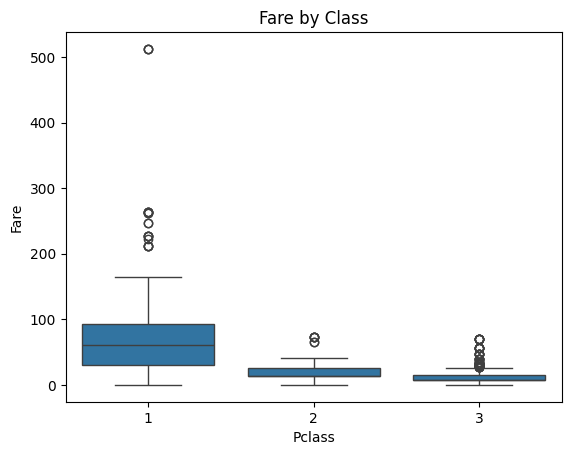

In [127]:
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Fare by Class')
plt.show()


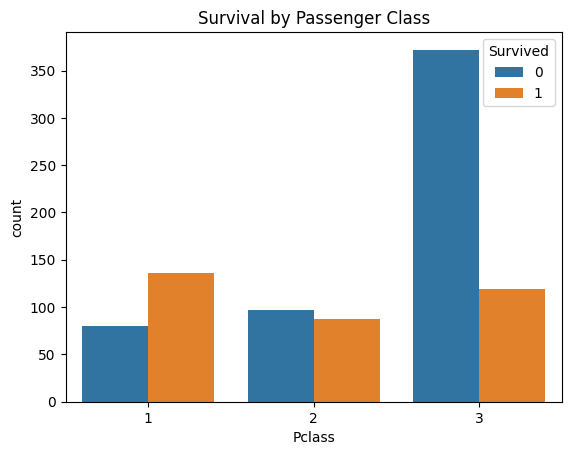

In [128]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

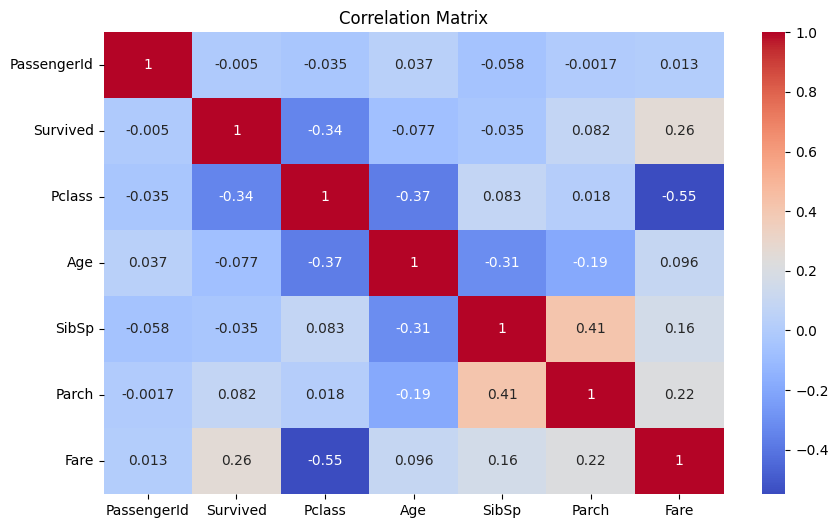

In [129]:
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


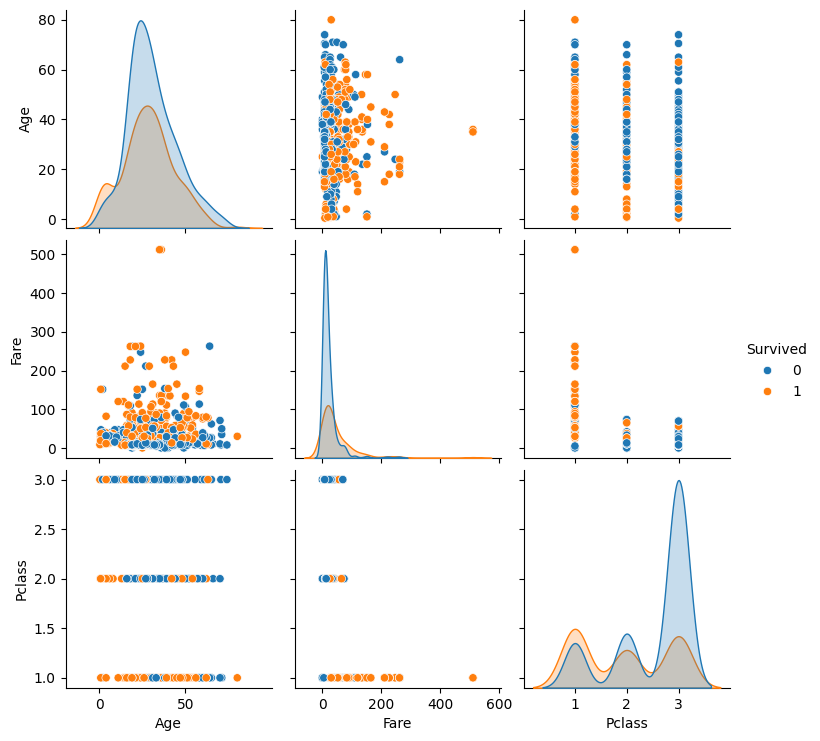

In [130]:
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()


In [131]:
X = train_clean.drop('Survived', axis=1)
Y = train_clean['Survived']


In [132]:
X_test = test_clean.drop('PassengerId', axis=1)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

In [133]:
print("NaNs in X:\n", X.isnull().sum())
print("NaNs in y:\n", y.isnull().sum())


NaNs in X:
 Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64
NaNs in y:
 0


In [134]:
X = X.fillna(0)  # or use median or mean if preferred


In [135]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # or 'mean'
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [136]:
model = LogisticRegression(max_iter=1000)
model.fit(X,Y)

LogisticRegression(max_iter=1000)

In [137]:
X_test = test_df.fillna(0)

In [ ]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

In [ ]:
submission.to_csv('titanic_predictions.csv', index=False)

print("✅ Predictions saved to 'titanic_predictions.csv'")